## K-Means Clustering with the Iris Dataset

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


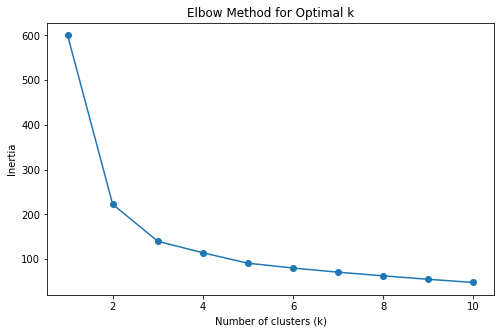

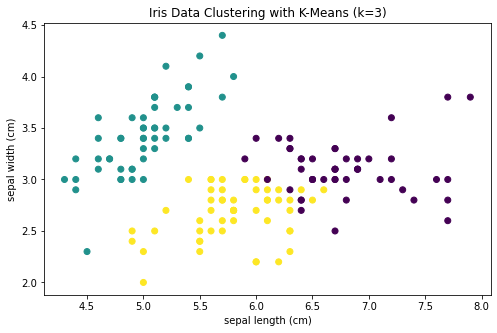

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit the model with the chosen number of clusters (e.g., k=3 from the elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X['Cluster'], cmap='viridis', marker='o')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f'Iris Data Clustering with K-Means (k={optimal_k})')
plt.show()
